In [96]:
import pandas as pd
import glob
from itertools import product, combinations
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

## Read in data and plot

In [97]:
logs = glob.glob('outputs/narratives_compare/*sherlock*')

In [98]:
metrics = ['loss', 'surprisal', 'entropy', 'is_true']

In [99]:
for i, l in enumerate(logs):
    ldf = pd.read_csv(l, sep='\t', index_col=0)
    if i % 100 == 0:
        print(f'{i} of {len(logs)}')
    if l == logs[0]:
        all_logs = ldf
    else:
        all_logs = pd.concat([all_logs, 
                              ldf], ignore_index=True)
all_logs['is_true'] = (all_logs['target'] == all_logs['top_predicted']).astype(int)
all_logs['surprisal'] = -np.log2(all_logs['prob_true'])
aggs = all_logs.groupby(['case_sensitive', 'model', 
                         'context_size', 'dataset'])[metrics].mean().reset_index()

0 of 32


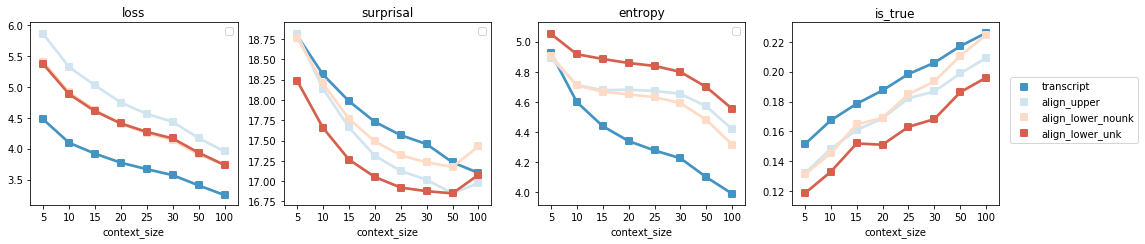

In [100]:
fig, ax = plt.subplots(ncols=4, figsize=(16,3.5))
for i, m in enumerate(metrics):
    sns.pointplot(data=aggs, 
                  x='context_size', 
                  y=m, 
                  hue='case_sensitive', 
                  ax=ax[i],
                  hue_order=['transcript', 
                             'align_upper', 
                             'align_lower_nounk', 
                             'align_lower_unk'],
                  palette='RdBu_r', 
                  markers='s', 
                  capsize=.05)
    ax[i].set_title(m)
    ax[i].set_ylabel('')
    if i!=3:
        ax[i].legend('')
    else:
        ax[i].legend(bbox_to_anchor=(1.05, .7), 
                     loc=2, 
                     borderaxespad=0.)
        # change line width where possible
plt.tight_layout()
plt.show()

### Pairwise correlations

In [101]:
datasets = all_logs.dataset.unique().tolist()
context_size = all_logs.context_size.unique().tolist()
types = ['transcript', 'align_upper', 'align_lower_nounk', 'align_lower_unk']

In [102]:
from itertools import combinations
pairs = list(combinations(types, 2))

In [103]:
outs = []

for d in datasets:
    for c in context_size:
        try:
            for p in pairs:
                    ds = all_logs[all_logs['dataset']==d]
                    ds = ds[ds['context_size']==c]
                    p1 = ds[ds['case_sensitive']==p[0]]
                    p2 = ds[ds['case_sensitive']==p[1]]
                    for m in metrics:
                        cc = np.corrcoef(p1[m], p2[m])[0,1]
                    outs.append((d,c,p[0],p[1],cc))
        except:
            print(d,c,p)
            break
    
outd = pd.DataFrame(outs, 
                    columns=['dataset',
                             'context',
                             'type0',
                             'type1',
                             'corr'])

sherlock 50 ('transcript', 'align_upper')


In [104]:
t = all_logs[(all_logs['dataset']=='sherlock') & (all_logs['context_size']==5) & (all_logs['case_sensitive']=='transcript')]

In [105]:
d = all_logs[(all_logs['dataset']=='sherlock') & (all_logs['context_size']==5) & (all_logs['case_sensitive']=='align_upper')]

In [ ]:
# for each dataset and each metric
# get the four time-series
# look at correlraions